<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Omid Keshavarz

**Student ID**:99102361





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [2]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('./Q3/data_logistic.csv')

# Extract features and labels
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values.reshape(-1, 1)

# Print the shapes of X and Y
print(X.shape)
print(Y.shape)


(10000, 3)
(10000, 1)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:
Normalizing data is a crucial preprocessing step before training machine learning models for several reasons:

Scale Independence: Features often have different scales. For example, one feature might range from 0 to 1, while another might range from 0 to 1000. If we don't normalize these features, the model might give undue importance to features with larger scales, leading to suboptimal performance.
Faster Convergence: Normalizing data can help algorithms converge more quickly during training. Many optimization algorithms, such as gradient descent, work more efficiently when features are on similar scales. Normalizing the data can help prevent oscillation and slow convergence.
Improved Numerical Stability: Normalizing data can improve the numerical stability of the optimization process. Large input values can lead to large intermediate values in computations, which may cause numerical overflow or underflow issues. Normalizing data to a similar scale helps mitigate these problems.
Regularization: Some regularization techniques, such as L1 and L2 regularization, assume that features are on similar scales. Normalizing the data ensures that regularization penalties are applied fairly across all features.

In [3]:
import numpy as np

# Calculate mean and standard deviation for each feature
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# Normalize features
X_normalized = (X - X_mean) / X_std

# Calculate mean and standard deviation for labels
Y_mean = np.mean(Y)
Y_std = np.std(Y)

# Normalize labels
Y_normalized = (Y - Y_mean) / Y_std

# Print the shapes of X_normalized and Y_normalized
print(X_normalized.shape)
print(Y_normalized.shape)


(10000, 3)
(10000, 1)


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [4]:
import numpy as np

# Add a column of ones to represent the bias term
X = np.insert(X_normalized, 0, 1, axis=1)

# Print the shape of X
print(X.shape)


(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [5]:
import numpy as np

def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    return 1 / (1 + np.exp(-Z))


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [6]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    loss = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    reg_term = regLambda / (2 * m) * np.sum(theta[1:]**2)  # Regularization term excluding bias term
    return loss + reg_term


### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:


For the $j^{th}$ element of the gradient of the cost function with respect to $\theta$, the expression is derived from the general gradient formula for logistic regression, with the additional consideration of regularization.

The general formula for the gradient of the cost function with respect to $\theta_j$ (for $j = 1, 2, \ldots, d$) is:
$$

\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m} \theta_j

$$



This equation comprises two terms:

The derivative of the loss function with respect to $\theta_j$, which represents the contribution of the $j^{th}$ feature to the error. It is computed as the average of the product of the prediction error $(\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)})$ and the $j^{th}$ feature value $x_j^{(i)}$ over all training examples.
The regularization term, which penalizes large values of $\theta_j$. It is added to the derivative of the loss function to encourage smaller parameter values, thus preventing overfitting. This term is scaled by the regularization parameter $\lambda$.
However, for $j = 0$, corresponding to the bias term, the regularization is not applied, so the formula simplifies to:

$$

\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)})

$$

In [7]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, a d-dimensional vector
    '''
    m, n = X.shape
    h = sigmoid(np.dot(X, theta))
    error = h - y
    grad = np.dot(X.T, error) / m
    grad[1:] += (regLambda / m) * theta[1:]  # Regularization term excluding bias term
    return grad


### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [8]:
def fit(X, y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    m, n = X.shape
    theta = np.zeros((n, 1))  # Initialize theta to zeros
    loss_history = []  # List to store the loss at each iteration
    for _ in range(maxNumIters):
        loss = computeCost(theta, X, y, regLambda)
        grad = computeGradient(theta, X, y, regLambda)
        theta_new = theta - alpha * grad
        if hasConverged(theta, theta_new, epsilon):
            break
        theta = theta_new
        loss_history.append(loss)
    return theta, loss_history

def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in previous iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    return np.linalg.norm(theta_new - theta_old) <= epsilon


Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [10]:
theta, loss_history = fit(X, Y_normalized)  # calculating theta and loss of each iteration

# Print loss for each iteration
for i, loss in enumerate(loss_history):
    print(f"Iteration {i + 1}: Loss = {loss}")

# Print final theta
print("Final theta:")
print(theta)


Iteration 1: Loss = 0.6931471805599453
Iteration 2: Loss = 0.6844231894886041
Iteration 3: Loss = 0.6757430885565388
Iteration 4: Loss = 0.6671066508137952
Iteration 5: Loss = 0.6585136456832319
Iteration 6: Loss = 0.649963839094398
Iteration 7: Loss = 0.641456993617721
Iteration 8: Loss = 0.6329928685988295
Iteration 9: Loss = 0.6245712202928538
Iteration 10: Loss = 0.6161918019985356
Iteration 11: Loss = 0.6078543641919976
Iteration 12: Loss = 0.599558654660019
Iteration 13: Loss = 0.5913044186326691
Iteration 14: Loss = 0.5830913989151598
Iteration 15: Loss = 0.5749193360187806
Iteration 16: Loss = 0.5667879682907841
Iteration 17: Loss = 0.558697032043097
Iteration 18: Loss = 0.55064626167974
Iteration 19: Loss = 0.5426353898228389
Iteration 20: Loss = 0.5346641474371224
Iteration 21: Loss = 0.5267322639528039
Iteration 22: Loss = 0.5188394673867502
Iteration 23: Loss = 0.51098548446185
Iteration 24: Loss = 0.5031700407244957
Iteration 25: Loss = 0.4953928606601025
Iteration 26: Los

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [12]:
from sklearn.model_selection import train_test_split

# Split dataset into training, validation, and test sets
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y_normalized, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.222, random_state=42)  # 20% validation, 80% of 90% is 72%

# Print the shapes of the datasets
print("Training set shapes:", X_train.shape, Y_train.shape)
print("Validation set shapes:", X_val.shape, Y_val.shape)
print("Test set shapes:", X_test.shape, Y_test.shape)


Training set shapes: (7002, 4) (7002, 1)
Validation set shapes: (1998, 4) (1998, 1)
Test set shapes: (1000, 4) (1000, 1)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [13]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    h_theta = sigmoid(np.dot(X, theta))
    Y = (h_theta > 0.5).astype(int)
    return Y


Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**: 

Effect of Learning Rate:
Too Small: If the learning rate is too small, the model may take a long time to converge, or it may get stuck in local minima.
Too Large: On the other hand, if the learning rate is too large, the model may overshoot the minimum and fail to converge or diverge.
Best Value: The best learning rate is often found through experimentation. It should be large enough to converge quickly but small enough to avoid oscillations or divergence.


Effect of Regularization Constant:
Too Small (Weak Regularization): If the regularization constant is too small, the model may overfit the training data, resulting in poor generalization to unseen data.
Too Large (Strong Regularization): Conversely, if the regularization constant is too large, the model may underfit the training data, leading to high bias and low variance but potentially sacrificing too much predictive power.
Best Value: Similar to the learning rate, the best regularization constant is often found through experimentation. It should strike a balance between preventing overfitting and preserving model complexity.

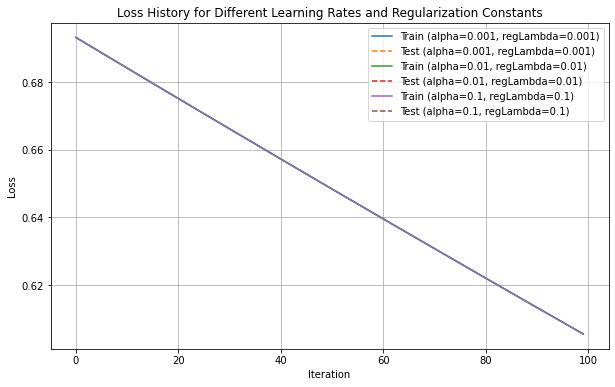

In [14]:
import matplotlib.pyplot as plt

# Define ranges for learning rate and regularization constant
learning_rates = [0.001, 0.01, 0.1]
reg_lambdas = [0.001, 0.01, 0.1]

# Initialize lists to store loss histories
train_losses = []
test_losses = []

# Iterate over all combinations of learning rates and regularization constants
for alpha in learning_rates:
    for regLambda in reg_lambdas:
        # Train the model using the fit function
        theta, loss_history = fit(X_train, Y_train, regLambda=regLambda, alpha=alpha)
        
        # Compute loss on train and test data
        train_loss = computeCost(theta, X_train, Y_train, regLambda)
        test_loss = computeCost(theta, X_test, Y_test, regLambda)
        
        # Append loss histories
        train_losses.append(loss_history)
        test_losses.append(test_loss)

# Plot loss histories
plt.figure(figsize=(10, 6))
for i, (alpha, regLambda) in enumerate(zip(learning_rates, reg_lambdas)):
    plt.plot(train_losses[i], label=f"Train (alpha={alpha}, regLambda={regLambda})")
    plt.plot(test_losses[i], label=f"Test (alpha={alpha}, regLambda={regLambda})", linestyle='--')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.legend()
plt.grid(True)
plt.show()


## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.957

In [17]:
# Binarize the labels (convert to 0 or 1)
Y_train_binary = (Y_train > 0).astype(int)
Y_test_binary = (Y_test > 0).astype(int)

# Train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train_binary)

# Predict labels for the test set
Y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test_binary, Y_pred)
print("Accuracy of Gaussian Naive Bayes on test set:", accuracy)


Accuracy of Gaussian Naive Bayes on test set: 0.957


c:\Users\Digi Max\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.987

In [19]:
# Binarize the labels (convert to 0 or 1)
Y_train_binary = (Y_train > 0).astype(int)
Y_test_binary = (Y_test > 0).astype(int)

# Train the Linear Discriminant Analysis (LDA) classifier
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, Y_train_binary)

# Predict labels for the test set
Y_pred = lda_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test_binary, Y_pred)
print("Accuracy of Linear Discriminant Analysis on test set:", accuracy)


Accuracy of Linear Discriminant Analysis on test set: 0.987


c:\Users\Digi Max\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: Since LDA had the best performance on this dataset so LDA is the best method for classifying this dataset.
